In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# Упражнения к главе 9
## Упражнение 9.2
Создать треугольный сигнал и напечатать его. Вычислить спектр треугольного сигнала, применить differentiate и напечатать результат. Преобразовать спектр обратно в сигнал и напечатать его. Определить, есть ли различия в воздействии diff и differentiate на этот сигнал.

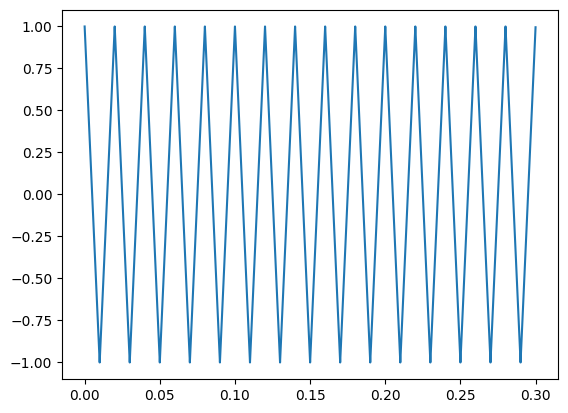

In [4]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal(freq=50).make_wave(duration=0.3, framerate=44100)
triangle.plot()

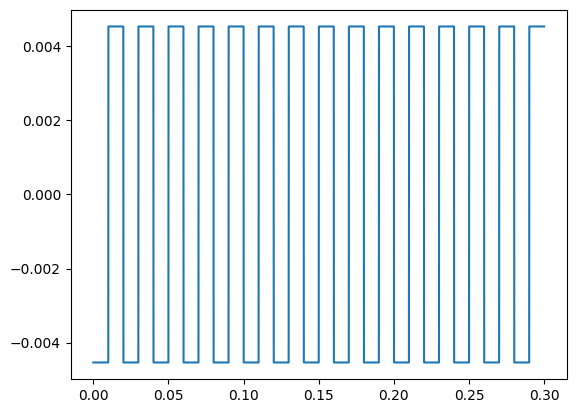

In [5]:
triangle_diff = triangle.diff()
triangle_diff.plot()

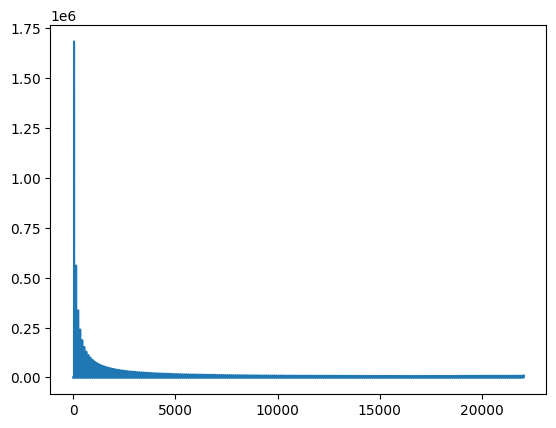

In [7]:
triangle.make_spectrum().differentiate().plot()

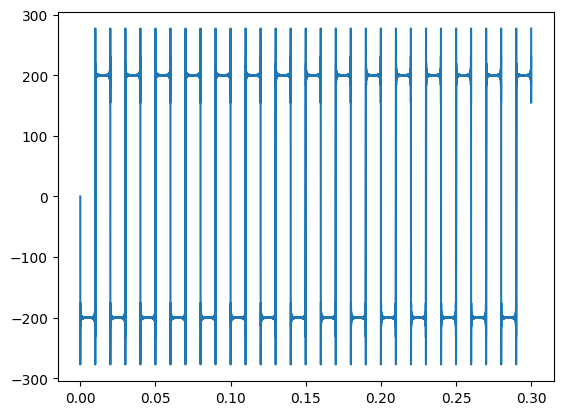

In [6]:
triangle_differ = triangle.make_spectrum().differentiate().make_wave()
triangle_differ.plot()

В обоих случаях в результате получен квадратный сигнал, однако значительно различаются амплитуды (из-за умножения амплитуда сигнала на 2 * pi * f), а также при работе со спектром возникают высокочастотные компоненты на переходах, поскольку множитель, усиливающий апмлитуду, пропорционален частоте.

## Упражнение 9.3
Создать прямоугольный сигнал и напечатать его. Применить cumsum и напечать результат. Вычислить спектр прямоугольного сигнала, применить integrate и напечатать результат. Преобразовать спектр обратно в сигнал и напечатать его. Определить, есть ли различия в воздействии cumsum и integrate на этот сигнал.

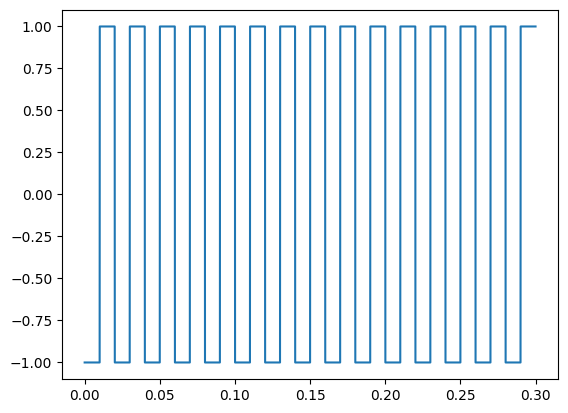

In [9]:
from thinkdsp import SquareSignal

square = SquareSignal(freq=50).make_wave(duration=0.3, framerate=44100)
square.plot()

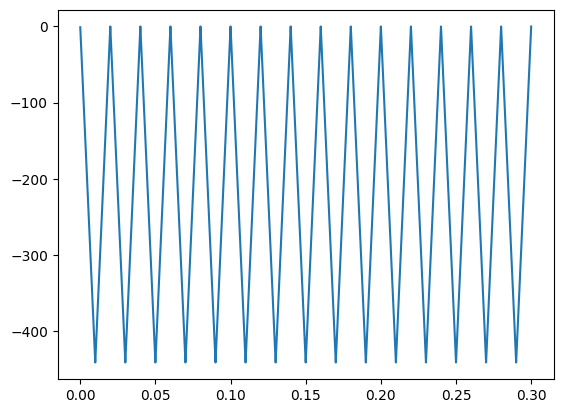

In [10]:
square_sum = square.cumsum()
square_sum.plot()

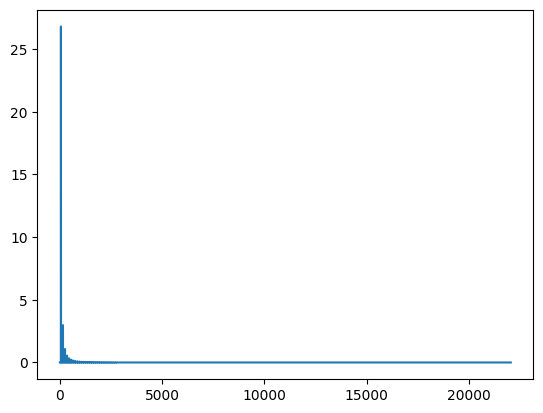

In [13]:
square_int_spec = square.make_spectrum().integrate()
square_int_spec.hs[0] = 0
square_int_spec.plot()

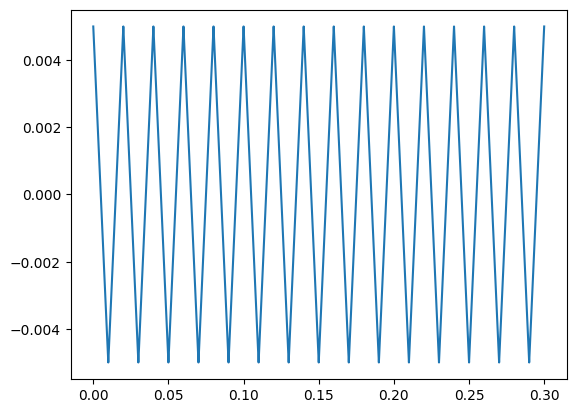

In [14]:
square_int = square_int_spec.make_wave()
square_int.plot()

В обоих случаях получены треугольные волны, однако различаются амплитуды из-за деления амплитуды в частотной области на 2 * pi * f.

## Упражнение 9.4
Создать пилообразный сигнал, вычислить его спектр, а затем дважды применить integrate. Напечатать результирующий сигнал и его спектр. Определить математическую форму сигнала и почему она напоминает синусоиду.

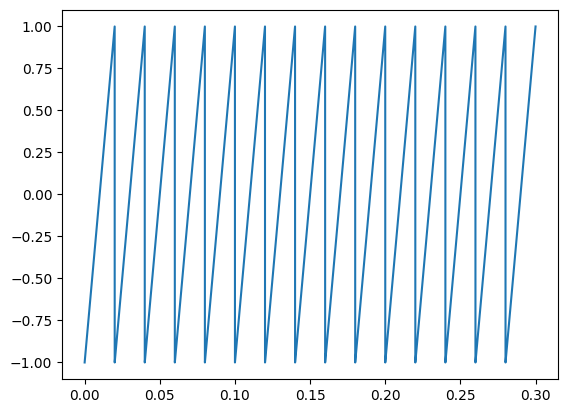

In [16]:
from thinkdsp import SawtoothSignal

sawtooth = SawtoothSignal(freq=50).make_wave(duration=0.3, framerate=44100)
sawtooth.plot()

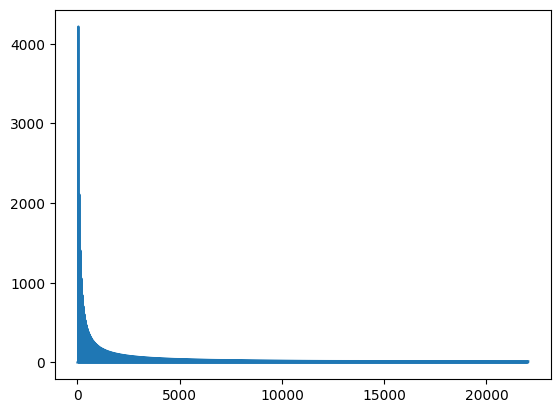

In [17]:
sawtooth.make_spectrum().plot()

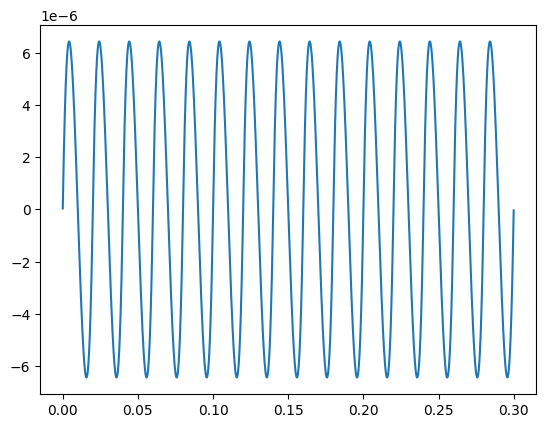

In [18]:
sawtooth_int_spec = sawtooth.make_spectrum().integrate().integrate()
sawtooth_int_spec.hs[0] = 0
sawtooth_int = sawtooth_int_spec.make_wave()
sawtooth_int.plot()

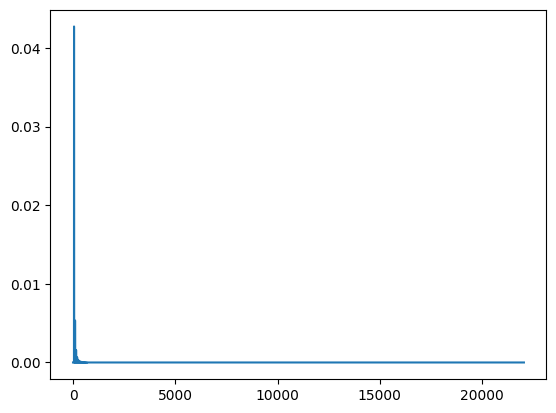

In [19]:
sawtooth_int_spec.plot()

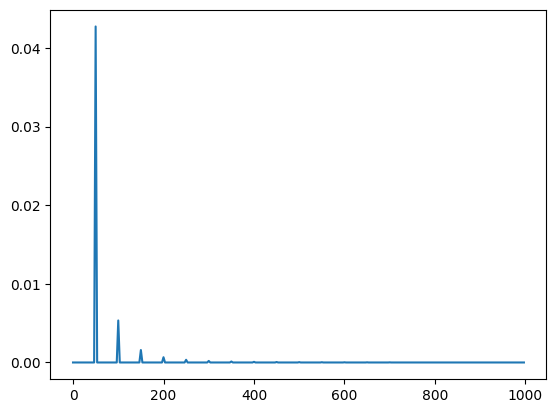

In [20]:
sawtooth_int_spec.plot(high=1000)

Так как двойной интеграл линейной функции - полином 3 степени. результирующий сигнал состоит из частей кубической параболы. Сходство с синусоидой обусловлено тем, что интегрирование делит амплитуду каждой частоты пропорционально собственно частоте, т.е. работает как НЧ-фильтр. В результате наибольшую роль начинает играть фундаментальная частота, и ее гармоники становятся менее заметны.

## Упражнение 9.5
Создать CubicSignal, вычислить вторую производную, дважды применив diff. Определить как выглядит результат. Вычислить вторую производную, дважды применив differentiate к спектру. Определить похожи ли результаты.
Распечатать фильтры, соответствующие второй разнице и второй производной, и сравнить их.

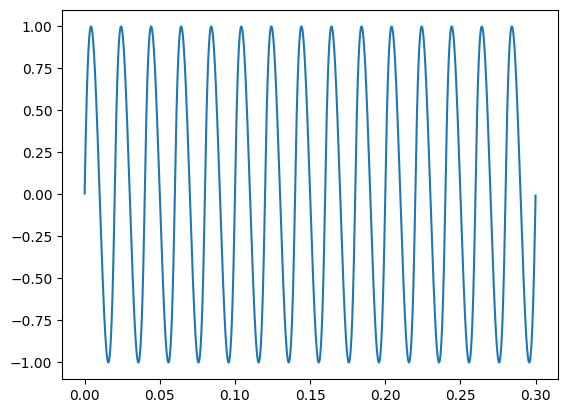

In [27]:
from thinkdsp import CubicSignal

cubic = CubicSignal(freq=50).make_wave(duration=0.3, framerate=44100)
cubic.plot()

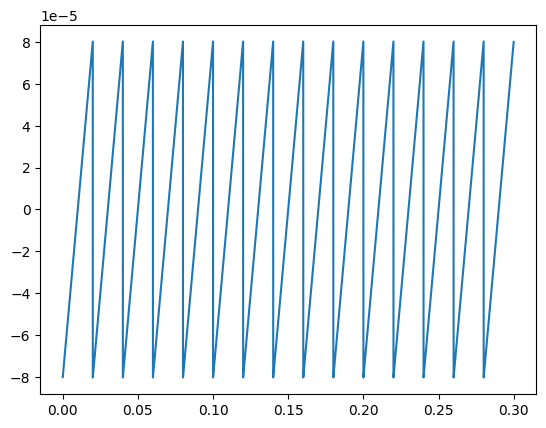

In [28]:
cubic_diff = cubic.diff().diff()
cubic_diff.plot()

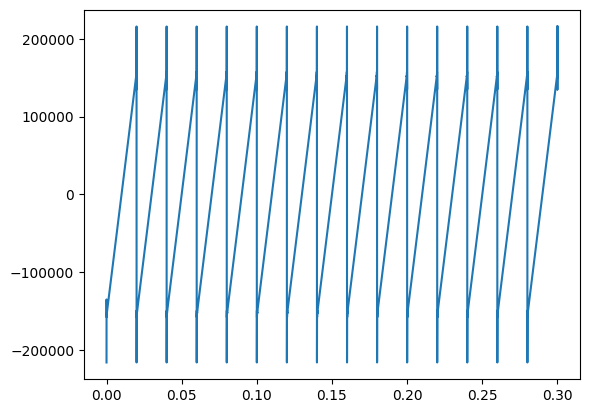

In [29]:
cubic_differ = cubic.make_spectrum().differentiate().differentiate().make_wave()
cubic_differ.plot()

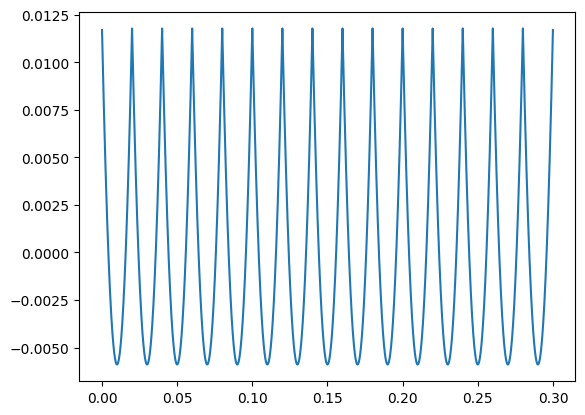

In [30]:
cubic_diff_1 = cubic.diff()
cubic_diff_1.plot()

В результате обоих преобразований получена треугольная волна. При преобразовании через частотную область амплитуда увеличена на несколько порядков, а также очень заметны высокочастотные компоненты на переходах. Это отчасти вызвано усилением высоких частот при дифференцировании, отчасти тем, что первая производная сигнала не везде дифференцируема.

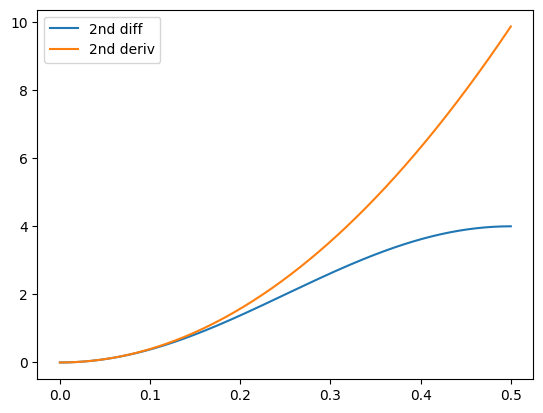

In [33]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, 10000)
diff_wave = Wave(padded, framerate=1)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')
deriv_filter = diff_wave.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')
plt.legend()

Оба фильтра, получаемых дифференцированием, являются ВЧ-фильтрами. Они достаточно близки в начале, но затем аппроксимация разностями усиливает высокие частоты значительно слабее.